# Introduction to Seaborn

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Styling

In [17]:
sns.set_theme() #Apply the default theme

# Numerical Plots

* **Distribution (phân bổ)**: Histogram (phân bổ tần suất), KDE (Kernel Density Estimate), Displot

* **Bar Plot (biểu đồ cột)**
* **Count Plot**
* **Box Plot**: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng
* **Facet Plot**: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.

* **Join Plot**
* **Pair Plot**

* **Heat Map**: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

## Distribution Plot

### Histogram
* Univariate distribution of observations (đơn biến)


In [5]:
tips_df = sns.load_dataset('tips')

In [6]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


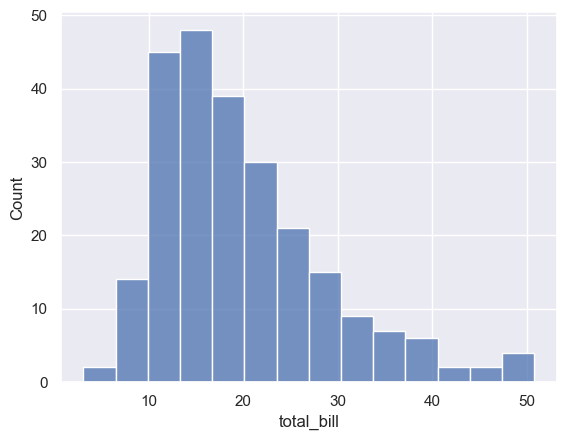

In [8]:
sns.histplot(data=tips_df["total_bill"]);

In [7]:
tips_df["total_bill"].value_counts().sort_values(ascending=False)

total_bill
13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

### KDE Plot
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
* KDE represents the data using a continuous probability density curve in one or more dimensions

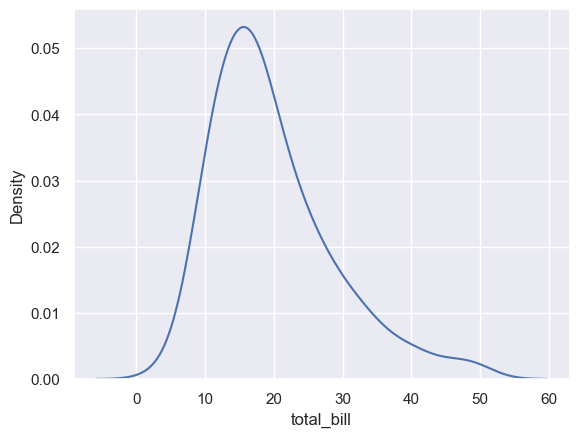

In [9]:
sns.kdeplot(data=tips_df['total_bill']);

### Displot

* Informative distributional summaries
* Statistical analyses require knowledge about the distribution of variables in your dataset. 
* The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation

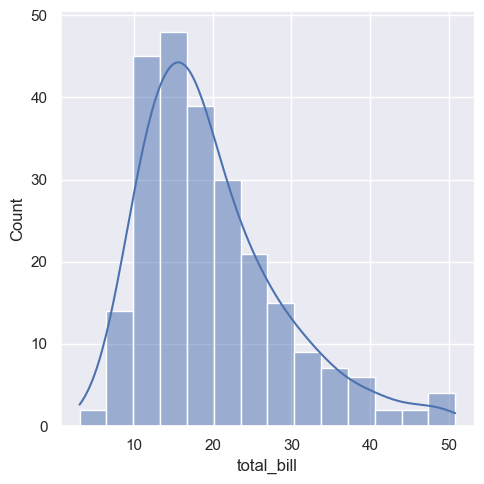

In [11]:
sns.displot(data=tips_df, x="total_bill", kde=True);

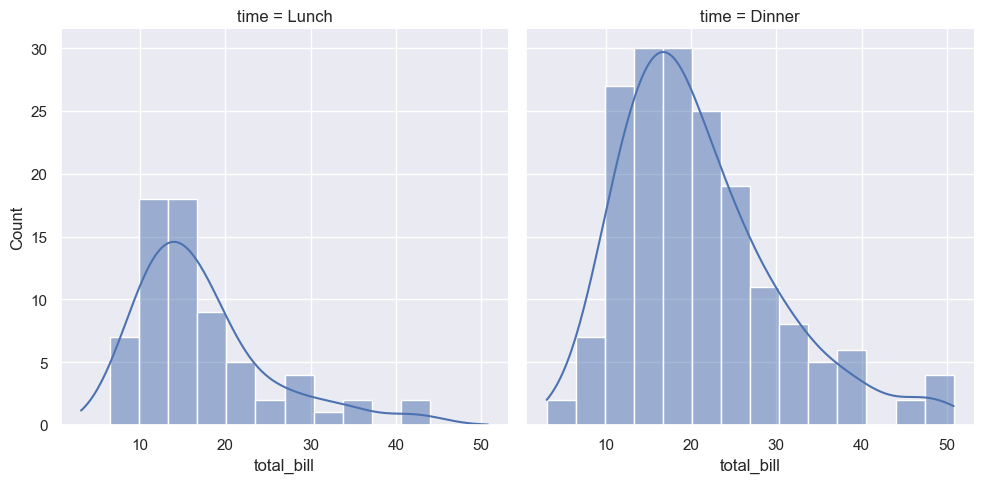

In [10]:
sns.displot(data=tips_df, x="total_bill", col="time", kde=True);

# Categorical Plots

## Bar Plots

Trung bình Male hay Female tip nhiều hơn?

In [13]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


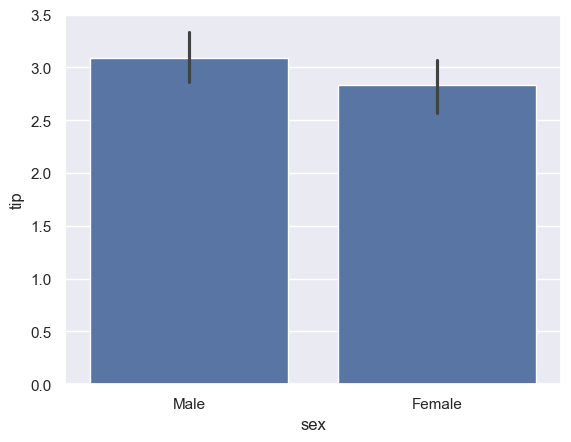

In [14]:
sns.barplot(data=tips_df, x="sex", y="tip", estimator=np.mean);

### Count Plot

Khảo sát số lượng khách hàng theo giới tính

In [15]:
tips_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

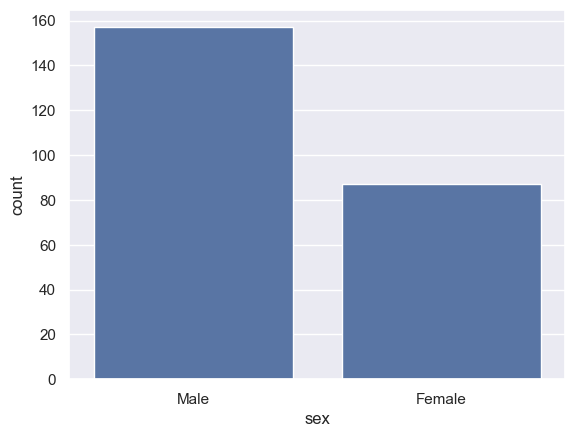

In [20]:
sns.countplot(data=tips_df, x="sex");

### Box Plot
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

Khảo sát phân bố total_bill theo các ngày trong tuần

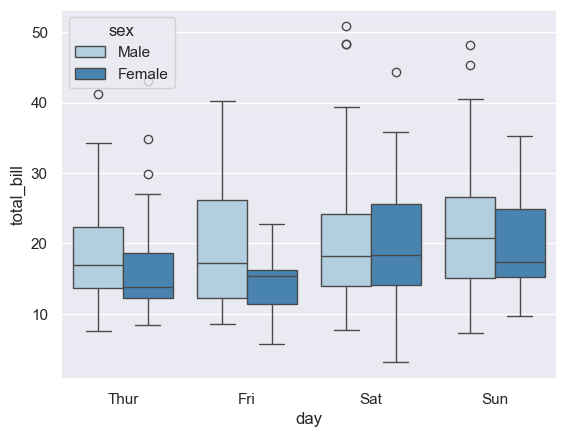

In [23]:
sns.boxplot(data=tips_df, x="day", y="total_bill", hue="sex", palette='Blues');

# plt.legend(loc=0);

### Facet Grid
* Vẽ đồ thị nhiều hơn 2 chiều
* FacetGrid can be drawn with up to three dimensions: `row`, `col`, and `hue`.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method. 

In [24]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


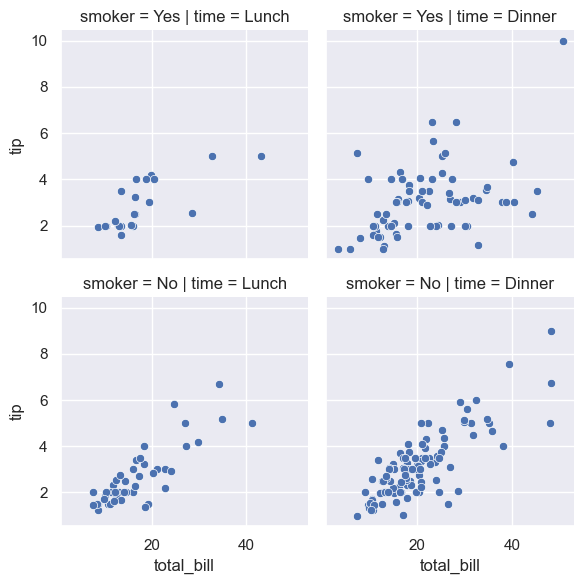

In [25]:
tips_fg = sns.FacetGrid(data=tips_df, row="smoker", col="time") #Create a class instance of Facet Grid class
tips_fg.map(sns.scatterplot,  'total_bill', 'tip');

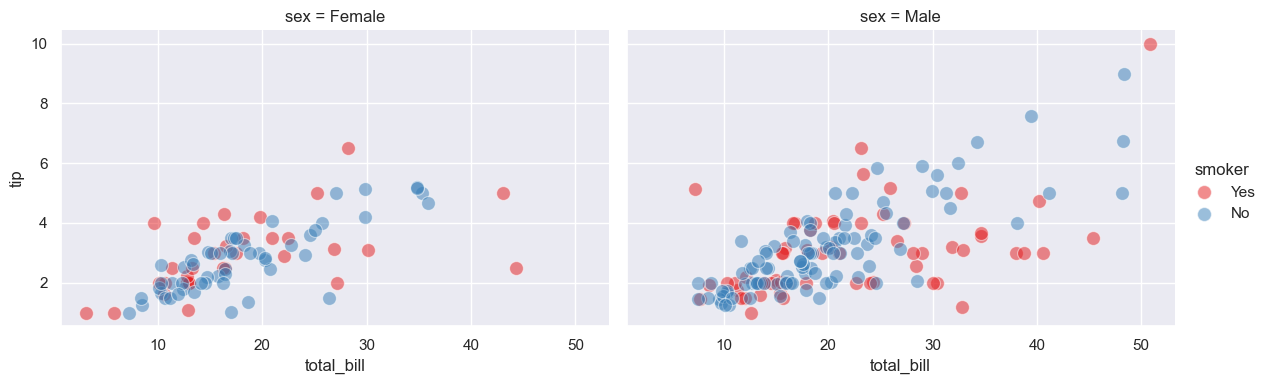

In [37]:
new_fg = sns.FacetGrid(data=tips_df, col="sex", col_order=["Female", "Male"], 
                       hue="smoker",
                       palette='Set1',
                       height=4, aspect=1.5)
# new_fg.map(sns.scatterplot, 'total_bill', 'tip', s=100, alpha=0.5)
kws = dict(s=100, alpha=0.5)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws)
new_fg.add_legend();

### Joint Plot
* `joint` distribution between two variables along with each variable’s marginal distribution

In [38]:
penguins_df = sns.load_dataset('penguins')

In [39]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


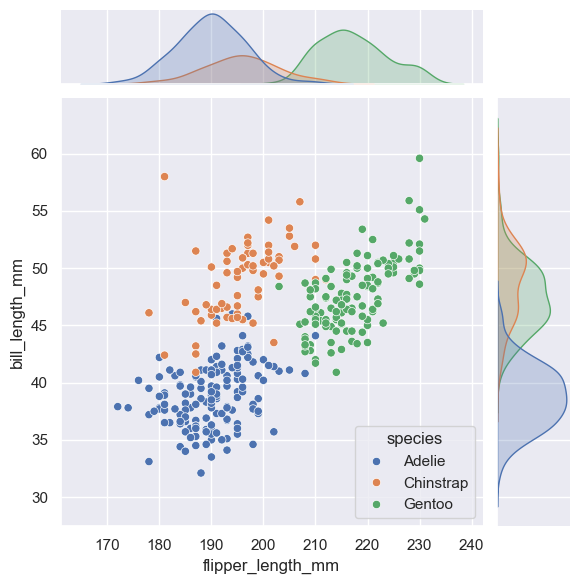

In [42]:
# sns.jointplot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm");
sns.jointplot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm", hue="species");

### Pair Plots

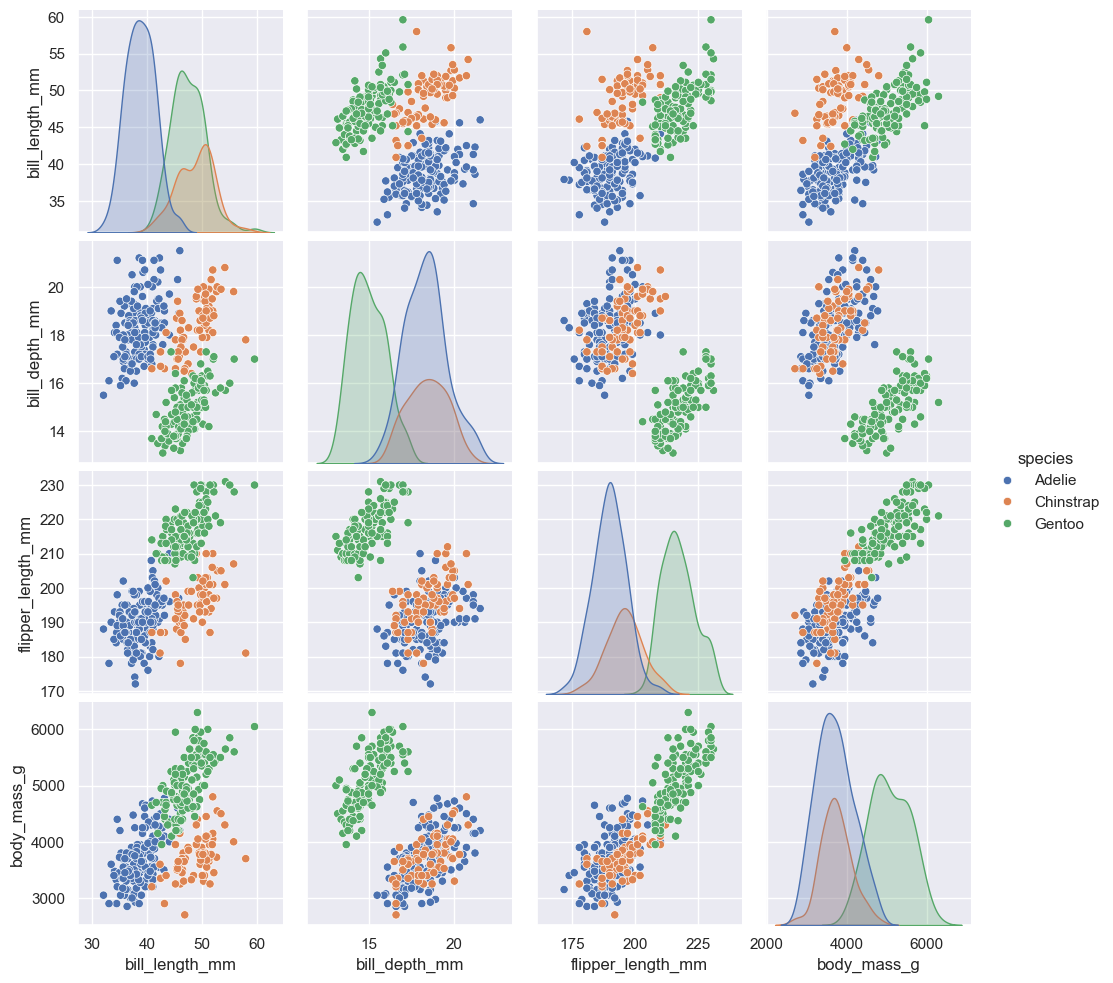

In [43]:
sns.pairplot(data=penguins_df, hue="species");

### Heatmaps
Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [44]:
flights_df = sns.load_dataset("flights")

In [45]:
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [48]:
flights = pd.pivot_table(flights_df, index='month', columns='year', values='passengers')
flights

C:\Users\Admin\AppData\Local\Temp\ipykernel_5400\1215138616.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = pd.pivot_table(flights_df, index='month', columns='year', values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


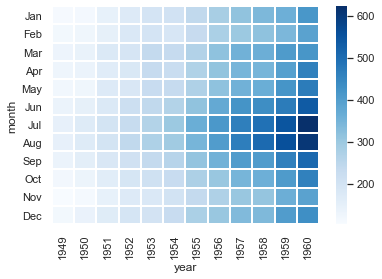

In [27]:
sns.heatmap(data=flights, cmap='Blues', linecolor='white', linewidths=1);

## Project: Nutrition Data Visualisation on 80 cereal products

Link: https://www.kaggle.com/crawford/80-cereals

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load dataset
cereal_df = pd.read_csv('./data/cereal.csv')

In [30]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [32]:
#irrelevant fields

fields = ['shelf', 'weight', 'cups', 'rating']
cereal_df_new = cereal_df.drop(fields, axis=1)
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [33]:
#corr()

cereal_corr = cereal_df_new.corr() #Get correlation data
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [34]:
# ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [35]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [36]:
# np's triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

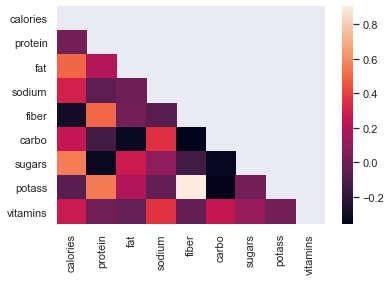

In [40]:
sns.heatmap(data=cereal_corr, mask=mask);

In [ ]:
# When removing the upper tri-angle, here are still two empty cells in our matrix (calories & vitamin)

In [41]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [42]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]

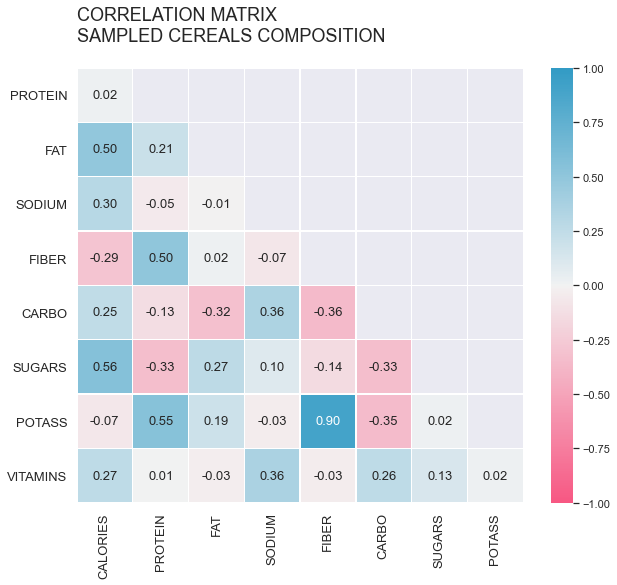

In [69]:
fig, ax = plt.subplots(figsize=(10,8))


#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);

In [71]:
adjusted_cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699
